In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

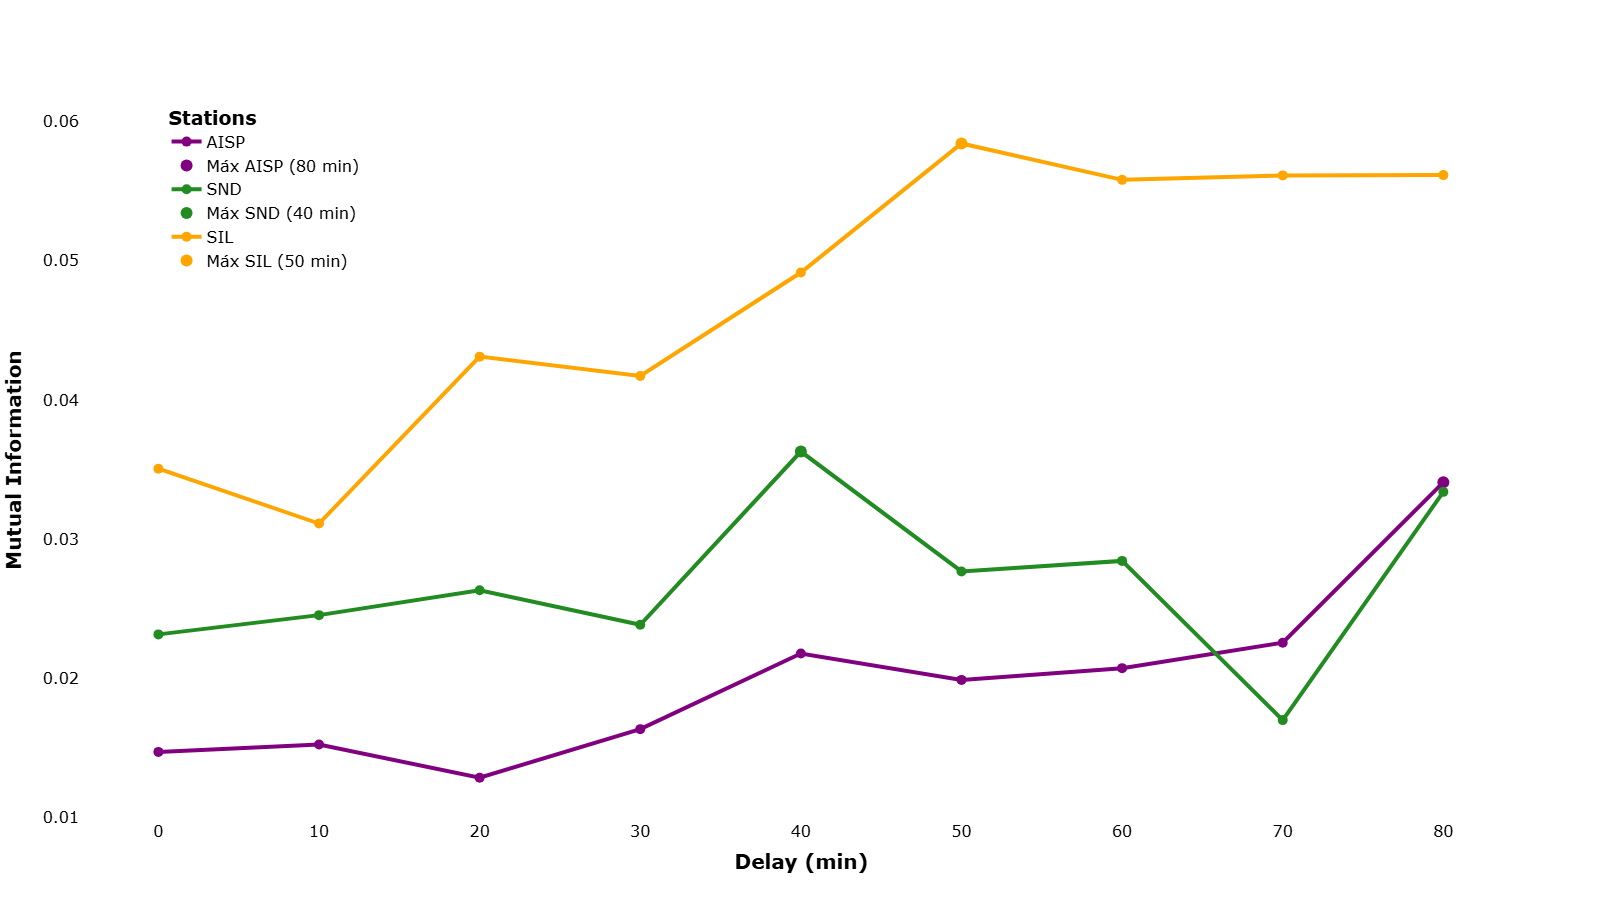

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import plotly.graph_objects as go

# --- AISP ---
merged1 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/aisp_local_nivel_merged.csv', index_col=0, parse_dates=True)
merged1_copy = merged1.copy()
merged1_copy['aisp_std'] = (merged1_copy['aisp'] - merged1_copy['aisp'].mean()) / merged1['aisp'].std()
merged1_copy['nivel_std'] = (merged1_copy['nivel'] - merged1_copy['nivel'].mean()) / merged1['nivel'].std()

# --- SND ---
merged2 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/snd_local_nivel_merged.csv', index_col=0, parse_dates=True)
merged2_copy = merged2.copy()
merged2_copy['snd_std'] = (merged2_copy['snd'] - merged2_copy['snd'].mean()) / merged2['snd'].std()
merged2_copy['nivel_std'] = (merged2_copy['nivel'] - merged2_copy['nivel'].mean()) / merged2['nivel'].std()

# --- SIL ---
merged3 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/sil_nivel_merged.csv', index_col=0, parse_dates=True)
merged3_copy = merged3.copy()
merged3_copy['sil_std'] = (merged3_copy['sil'] - merged3_copy['sil'].mean()) / merged3['sil'].std()
merged3_copy['nivel_std'] = (merged3_copy['nivel'] - merged3_copy['nivel'].mean()) / merged3['nivel'].std()

# --- Parámetros de retardo ---
delays_minutes = np.arange(0, 81, 10)
delays_steps = delays_minutes // 10

# --- Calcular MI: AISP ---
mi_values_aisp = []
for d in delays_steps:
    aisp_shifted = merged1['aisp'].shift(d)
    df_temp = pd.DataFrame({'nivel': merged1['nivel'], 'aisp_shifted': aisp_shifted}).dropna()
    mi = mutual_info_regression(df_temp[['nivel']], df_temp['aisp_shifted'], random_state=0)[0] if len(df_temp) > 0 else np.nan
    mi_values_aisp.append(mi)
idx_max_aisp = np.nanargmax(mi_values_aisp)
lag_aisp = delays_minutes[idx_max_aisp]
mi_max_aisp = mi_values_aisp[idx_max_aisp]

# --- Calcular MI: SND ---
mi_values_snd = []
for d in delays_steps:
    snd_shifted = merged2['snd'].shift(d)
    df_temp = pd.DataFrame({'nivel': merged2['nivel'], 'snd_shifted': snd_shifted}).dropna()
    mi = mutual_info_regression(df_temp[['nivel']], df_temp['snd_shifted'], random_state=0)[0] if len(df_temp) > 0 else np.nan
    mi_values_snd.append(mi)
idx_max_snd = np.nanargmax(mi_values_snd)
lag_snd = delays_minutes[idx_max_snd]
mi_max_snd = mi_values_snd[idx_max_snd]

# --- Calcular MI: SIL ---
mi_values_sil = []
for d in delays_steps:
    sil_shifted = merged3['sil'].shift(d)
    df_temp = pd.DataFrame({'nivel': merged3['nivel'], 'sil_shifted': sil_shifted}).dropna()
    mi = mutual_info_regression(df_temp[['nivel']], df_temp['sil_shifted'], random_state=0)[0] if len(df_temp) > 0 else np.nan
    mi_values_sil.append(mi)
idx_max_sil = np.nanargmax(mi_values_sil)
lag_sil = delays_minutes[idx_max_sil]
mi_max_sil = mi_values_sil[idx_max_sil]

# --- Crear figura combinada ---
fig = go.Figure()

# AISP trace
fig.add_trace(go.Scatter(
    x=delays_minutes,
    y=mi_values_aisp,
    mode='lines+markers',
    name='AISP',
    marker=dict(size=10),
    line=dict(width=4, color='purple')
))
fig.add_trace(go.Scatter(
    x=[lag_aisp],
    y=[mi_max_aisp],
    mode='markers',
    marker=dict(size=12, color='purple'),
    name=f'Máx AISP ({lag_aisp} min)'
))

# SND trace
fig.add_trace(go.Scatter(
    x=delays_minutes,
    y=mi_values_snd,
    mode='lines+markers',
    name='SND',
    marker=dict(size=10),
    line=dict(width=4, color='forestgreen')
))
fig.add_trace(go.Scatter(
    x=[lag_snd],
    y=[mi_max_snd],
    mode='markers',
    marker=dict(size=12, color='forestgreen'),
    name=f'Máx SND ({lag_snd} min)'
))

# SIL trace
fig.add_trace(go.Scatter(
    x=delays_minutes,
    y=mi_values_sil,
    mode='lines+markers',
    name='SIL',
    marker=dict(size=10),
    line=dict(width=4, color='orange')
))
fig.add_trace(go.Scatter(
    x=[lag_sil],
    y=[mi_max_sil],
    mode='markers',
    marker=dict(size=12, color='orange'),
    name=f'Máx SIL ({lag_sil} min)'
))

# --- Layout ---
fig.update_layout(
    xaxis_title='<b>Delay (min)</b>',
    yaxis_title='<b>Mutual Information</b>',
    width=900,
    height=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
         title='<b>Stations</b>',
         font=dict(size=16, color='black'),
         x=0.06,           # Posición horizontal (0 = izquierda, 1 = derecha)
         y=1,           # Posición vertical (1 = arriba, 0 = abajo)
         xanchor='left',
         yanchor='top',
         bgcolor='rgba(255,255,255,0.7)'  # Fondo semitransparente para mejorar legibilidad
    ),
     xaxis=dict(title_font=dict(size=20,color='black'), tickfont=dict(size=16,color='black'),tickcolor='black',),
     yaxis=dict(title_font=dict(size=20,color='black'), tickfont=dict(size=16,color='black'))
)

fig.show()
